# PyTorch - Recurrent Neural Networks 
## Case Studies: Influenza case
BSDS4 Deep Learning Elective
2022 DS Elective 4 <br>
University of Science and Technology of the Philippines <br>
Instructor: Romen Samuel Wabina, MSc <br>


# Long Short-Term Memory on a Time Series

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

ilinet_full = pd.DataFrame(pd.read_csv('fludata.csv'))
ilinet_full

,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,2004,40,0.982275,0.897159,877,1256,185,3171,1176,353449
1,2004,41,1.018210,1.022480,1071,1373,216,3631,1187,355116
2,2004,42,1.176800,1.062960,1240,1534,226,4019,1267,378094
3,2004,43,1.301210,1.146960,1190,1671,285,4369,1293,380921
4,2004,44,1.277460,1.204950,1327,1718,291,4551,1302,377692
...,...,...,...,...,...,...,...,...,...,...
804,2020,10,5.130780,5.290100,13581,25957,5586,77452,2853,1464094
805,2020,11,5.631160,6.345940,13834,27321,6603,88341,2769,1392087
806,2020,12,6.357030,7.450870,10612,17276,6925,77817,2697,1044402
807,2020,13,5.178310,6.391350,5064,8245,6393,52802,2561,826148


In [10]:
ilinet_full_seasons = ilinet_full[0:782]  
data  = ilinet_full_seasons['ILITOTAL'].values
weeks = ilinet_full_seasons['WEEK'].values[0:52]

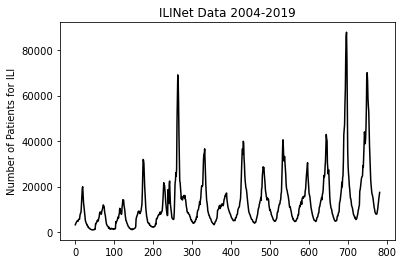

In [11]:
plt.plot(data, color = 'black')
plt.title("ILINet Data 2004-2019")
plt.ylabel("Number of Patients for ILI")
plt.show()

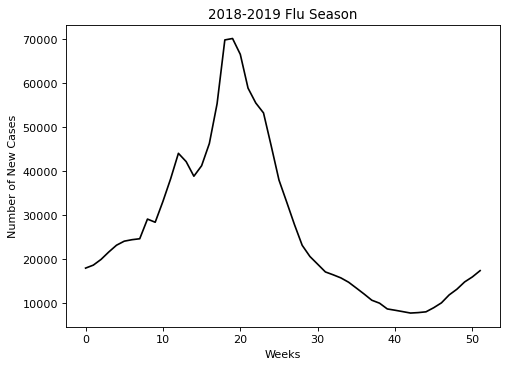

In [12]:
import numpy as np

end_weeks =   ilinet_full_seasons.index[ilinet_full_seasons['WEEK'] == 39].tolist()
start_weeks = ilinet_full_seasons.index[ilinet_full_seasons['WEEK'] == 40].tolist()

seasons=[]
for i in range(len(start_weeks)):
    c=start_weeks[i]
    seasons.append(data[c:c+52])
    
fig = plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(seasons[-1],color = 'black')
y_pos = np.arange(len(weeks))

plt.xlabel("Weeks")
plt.ylabel("Number of New Cases")
plt.title("2018-2019 Flu Season")
seasons=np.vstack(seasons)

## LSTM Network

A commonly used prediction strategy for time-series data (like the epidemic data of daily cases that we consider here) is recurrent neural networks (RNNs). Specific type of RNNs that could provide robust prediction are LSTMs (Long Short-Term Memory units). LSTMs are able to recognize temporal patterns in time series data that are then used in prediction [1]. 

Our implementation follows the following tutorial for time series prediction with LSTM in PyTorch:
 - https://stackabuse.com/time-series-prediction-using-lstm-with-pytorch-in-python/

### Normalizing the data for LSTM

In [13]:
import torch
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
maxval = seasons[0:-1].max()
minval = seasons[0:-1].min()

scaleddata = scaler.fit_transform(seasons.reshape(-1, 1))
full_data = torch.FloatTensor(scaleddata).view(-1)
train_data = full_data[:-52] #removing last season from training data

### Creating input-output sequences to train the model
Next, we create tuples that will be used to train the model. These tuples will contain 52 weeks of data as the input and the following week as the output.

In [16]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

train_window = 52
train_inout_seq = create_inout_sequences(train_data, train_window)
train_inout_seq

[(tensor([-0.9482, -0.9377, -0.9287, -0.9207, -0.9165, -0.9069, -0.9065, -0.9128,
          -0.8968, -0.8963, -0.8888, -0.8903, -0.8537, -0.8362, -0.8297, -0.8065,
          -0.7353, -0.6486, -0.5755, -0.5625, -0.6385, -0.7166, -0.7542, -0.8025,
          -0.8394, -0.8756, -0.9104, -0.9189, -0.9332, -0.9373, -0.9524, -0.9519,
          -0.9630, -0.9739, -0.9729, -0.9811, -0.9841, -0.9838, -0.9899, -0.9936,
          -0.9948, -0.9966, -0.9984, -0.9986, -0.9977, -0.9999, -1.0000, -0.9974,
          -0.9968, -0.9976, -0.9932, -0.9935]),
  tensor([-0.9387])),
 (tensor([-0.9377, -0.9287, -0.9207, -0.9165, -0.9069, -0.9065, -0.9128, -0.8968,
          -0.8963, -0.8888, -0.8903, -0.8537, -0.8362, -0.8297, -0.8065, -0.7353,
          -0.6486, -0.5755, -0.5625, -0.6385, -0.7166, -0.7542, -0.8025, -0.8394,
          -0.8756, -0.9104, -0.9189, -0.9332, -0.9373, -0.9524, -0.9519, -0.9630,
          -0.9739, -0.9729, -0.9811, -0.9841, -0.9838, -0.9899, -0.9936, -0.9948,
          -0.9966, -0.9984, 

An example of the input/output sequence is given below. There are 52 data points in each input sequence with one label, which is the next data point.

In [41]:
print(train_inout_seq[0])

(tensor([-0.9482, -0.9377, -0.9287, -0.9207, -0.9165, -0.9069, -0.9065, -0.9128,
        -0.8968, -0.8963, -0.8888, -0.8903, -0.8537, -0.8362, -0.8297, -0.8065,
        -0.7353, -0.6486, -0.5755, -0.5625, -0.6385, -0.7166, -0.7542, -0.8025,
        -0.8394, -0.8756, -0.9104, -0.9189, -0.9332, -0.9373, -0.9524, -0.9519,
        -0.9630, -0.9739, -0.9729, -0.9811, -0.9841, -0.9838, -0.9899, -0.9936,
        -0.9948, -0.9966, -0.9984, -0.9986, -0.9977, -0.9999, -1.0000, -0.9974,
        -0.9968, -0.9976, -0.9932, -0.9935]), tensor([-0.9387]))


Now we construct the model.

In [43]:
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]
        
model = LSTM()
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

We train the model on the input/output sequences we created earlier, i.e., we slide a window of 52 data-points (one season) over the whole training data by a single step at a time and predict the next point. We then compute the L1 loss between the predicted value and the ground truth.

In [16]:
epochs = 3
losses=[]
for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        losses.append(single_loss)
        single_loss.backward()
        optimizer.step()
    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.11077446
epoch:   2 loss: 0.0315621495


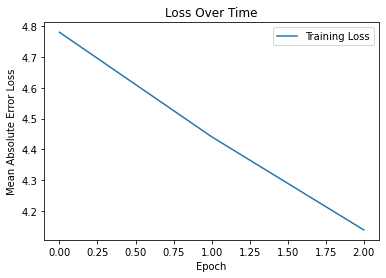

Epoch with minimum loss:  2


In [17]:
losses=[float(i) for i in losses]
lossperepoch  =[]
sep=int(len(losses)/epochs)
c=0
for i in range(0,len(losses),sep):
    lossperepoch.append(sum(losses[c*sep:c*sep+sep]))
    c=c+1
plt.plot(range(0,epochs),np.log(lossperepoch))
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Training Loss'])
plt.show()
print("Epoch with minimum loss: ",np.argmin(lossperepoch))

It looks like the model converges (although notice that the loss is pretty high). Lets see what the predictions for the next season look like.

In [45]:
fut_pred = 52

test_inputs = train_data.tolist()
predictions=[]
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        pred=model(seq).item()
        test_inputs.append(pred)
        predictions.append(pred)
actual_predictions = np.array(predictions)
actual_predictions

array([0.05842776, 0.06084325, 0.06182512, 0.0621495 , 0.06217344,
       0.06209415, 0.06200137, 0.06192686, 0.06187627, 0.06184575,
       0.06182933, 0.06182181, 0.06181938, 0.06181959, 0.06182096,
       0.06182265, 0.06182425, 0.06182562, 0.06182669, 0.0618275 ,
       0.0618281 , 0.06182852, 0.06182881, 0.061829  , 0.06182914,
       0.06182922, 0.06182928, 0.06182932, 0.06182934, 0.06182936,
       0.06182937, 0.06182937, 0.06182937, 0.06182938, 0.06182938,
       0.06182938, 0.06182938, 0.06182937, 0.06182937, 0.06182938,
       0.06182938, 0.06182938, 0.06182937, 0.06182937, 0.06182938,
       0.06182938, 0.06182938, 0.06182937, 0.06182938, 0.06182938,
       0.06182938, 0.06182938])

In [47]:
unscaled = scaler.inverse_transform(actual_predictions.reshape(-1, 1))
unscaled[0:20]

array([[46912.27374911],
       [47017.23054888],
       [47059.89431831],
       [47073.9891008 ],
       [47075.02927389],
       [47071.58404449],
       [47067.55252393],
       [47064.3151349 ],
       [47062.11694775],
       [47060.7904276 ],
       [47060.07706892],
       [47059.7502545 ],
       [47059.64487749],
       [47059.65410405],
       [47059.71334827],
       [47059.78667513],
       [47059.85660273],
       [47059.91584695],
       [47059.96246535],
       [47059.99775289]])

There predictions aren't very good.

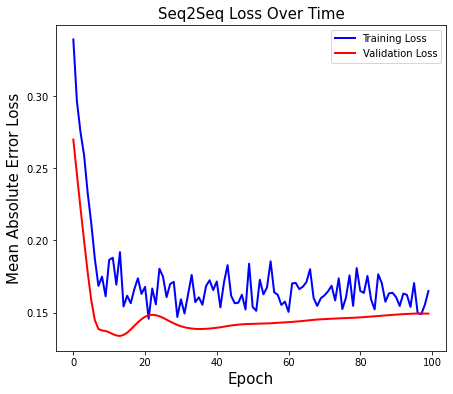

In [134]:
plt.figure(figsize = (7, 6))
plt.xlabel('Epoch', size = 15)
plt.ylabel('Mean Absolute Error Loss', size = 15)
plt.title('Seq2Seq Loss Over Time', size = 15)
plt.legend(['Training Loss','Validation Loss'])
plt.show()